In [116]:
import pandas as pd
import numpy as np 
import sklearn as sk
import xgboost as xgb 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import metrics




In [117]:
data= pd.read_csv(r"/Users/namanparuthi/Downloads/smoking_driking_dataset_Ver01.csv")

In [118]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()

data['DRK_YN'] = la.fit_transform(data['DRK_YN'])


In [119]:
data.drop(['sex','height','sight_left','sight_right','hear_left','hear_right','SBP','DBP','urine_protein','serum_creatinine','SMK_stat_type_cd'], inplace=True, axis=1)


In [120]:
y= data.loc[:,"DRK_YN"]
x=data.loc[:, ('triglyceride', 'gamma_GTP','age','weight','waistline','tot_chole','SGOT_AST','SGOT_ALT')]


In [121]:
import scipy
X=scipy.stats.zscore(x)

In [122]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [123]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

pred_xgb = xgb_classifier.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [124]:
accuracy=sk.metrics.accuracy_score(y_test, pred_xgb)
accuracy*100

70.42921268976649

Confusion Matrix for XGBoosting Classifier :
 [[69353 29872]
 [28758 70287]] 



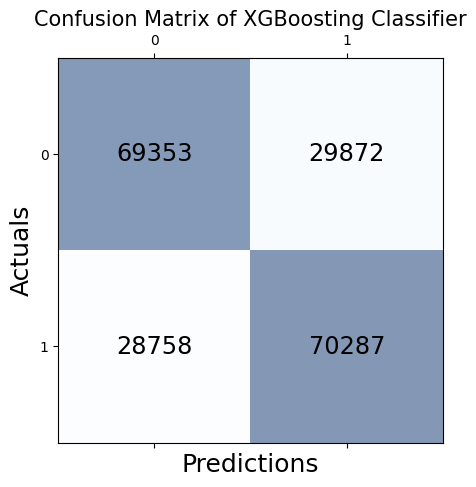

In [125]:
cm = metrics.confusion_matrix(y_test, pred_xgb)
print('Confusion Matrix for XGBoosting Classifier :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of XGBoosting Classifier', fontsize=15)
plt.show()